In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

2025-04-23 15:05:16.631938: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745442316.650772  599788 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745442316.656106  599788 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1745442316.671828  599788 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745442316.671854  599788 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1745442316.671857  599788 computation_placer.cc:177] computation placer alr

In [2]:
model_path = "checkpoints/animal_model_4_200.keras"
model = tf.keras.models.load_model(model_path)
model.summary()

2025-04-23 15:05:19.553935: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2025-04-23 15:05:19.553969: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:178] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-04-23 15:05:19.553975: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:183] retrieving CUDA diagnostic information for host: cajas-ROG-Zephyrus-G14-GA401QM-GA401QM
2025-04-23 15:05:19.553979: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:190] hostname: cajas-ROG-Zephyrus-G14-GA401QM-GA401QM
2025-04-23 15:05:19.554146: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:197] libcuda reported version is: 560.35.5
2025-04-23 15:05:19.554171: I external/local_xla/xla/stream_executor/cuda/cuda_di

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 4, 4, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     8,389,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │     1,049,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 90)             │        92,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,309,136 (165.21 MB)

 Trainable params: 9,531,482 (36.36 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 19,062,966 (72.72 MB)

In [5]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# Load the model
model_path = "checkpoints/animal_model_4_200.keras"
model = tf.keras.models.load_model(model_path)

# Load label map
label_map = json.load(open("labels.json"))

# Preprocess images in batches
data_path = "infer"
image_paths = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith(('.jpg', '.png'))]

images = []
for img_path in image_paths:
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)  # Correct preprocessing
    images.append(img_array)

# Convert list of images to a NumPy array
images_batch = np.array(images)

# Predict on the batch
res = model.predict(images_batch)

# Process predictions
predictions = np.argmax(res, axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step


Image: infer/Screenshot from 2025-04-23 15-04-47.png
Predicted class: 0
Predicted label: antelope
Image: infer/Screenshot from 2025-04-23 15-05-47.png
Predicted class: 86
Predicted label: wolf


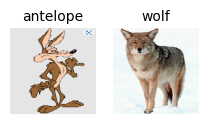

In [ ]:
import math

# Optional: Visualize predictions
for i, img_path in enumerate(image_paths):
    img = image.load_img(img_path, target_size=(128, 128))
    plt.subplot(math.ceil(len(image_paths)/5), 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(label_map[str(predictions[i])], fontsize=10)

# Add padding between rows
# plt.subplots_adjust(hspace=0.1)
plt.show()